# CPSC 571 Final Project Disease Simulator Visualizer

### This code runs the simulator program and outputs graphs to visualize the disease spread.

Authors: 
Erin Paslawski 10099039
Peter Nguyen 10096424
Bohyeon Cha 10162219

December 23 2021

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
sns.set()
from simulator import main

In [21]:
main()

How many days to run the simulator: 75
What percentage of the population is infected at day 0: 10
Numbers of days people are contagious with the disease: 10


In [22]:
all_df = pd.read_csv("sim_out.csv")
all_df['active_per_1000'] = (all_df["active_cases"] / all_df["population"]) * 1000
all_df['new_cases_per_1000'] = (all_df["new_cases"] / all_df["population"]) * 1000

[Text(0.5, 0, 'Day of Simulation'), Text(0, 0.5, 'Active Cases')]

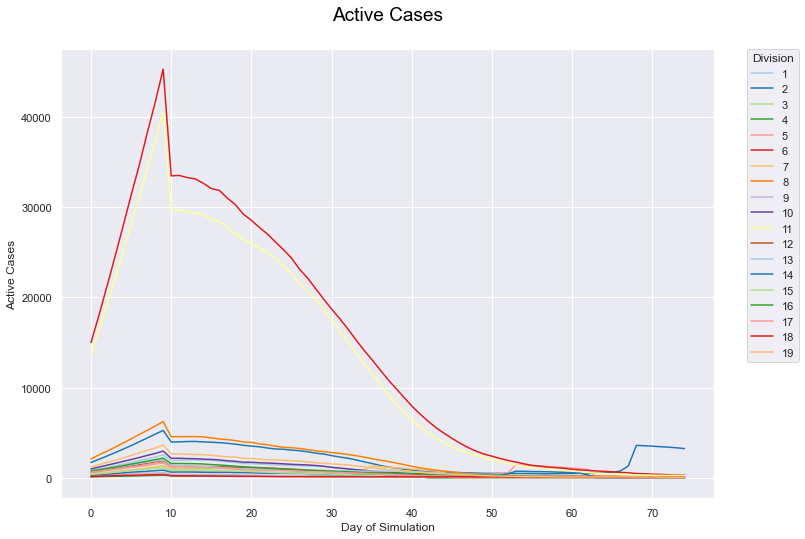

In [23]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt = sns.lineplot(x=all_df['day'],y=all_df['active_cases'], hue = all_df['division'],palette="Paired")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Division')
plt.set_title("Active Cases", 
             fontsize = 19,
             y=1.05,
             color='black')
plt.set(xlabel='Day of Simulation', 
       ylabel = 'Active Cases')

[Text(0.5, 0, 'Day of Simulation'), Text(0, 0.5, 'Active Cases per 1000')]

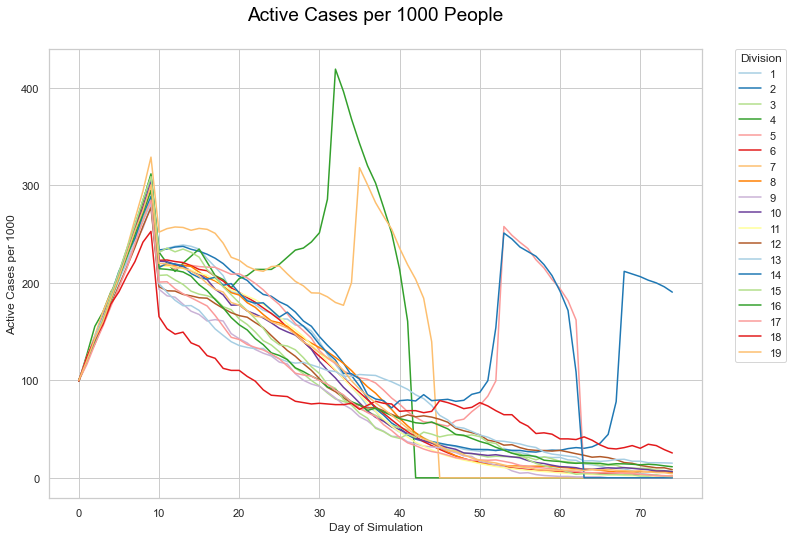

In [24]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt = sns.lineplot(x=all_df['day'],y=all_df['active_per_1000'], hue = all_df['division'],palette="Paired")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Division')
plt.set_title("Active Cases per 1000 People", 
             fontsize = 19,
             y=1.05,
             color='black')
plt.set(xlabel='Day of Simulation', 
       ylabel = 'Active Cases per 1000')

[Text(0.5, 0, 'Day of Simulation'), Text(0, 0.5, 'Recovered Cases')]

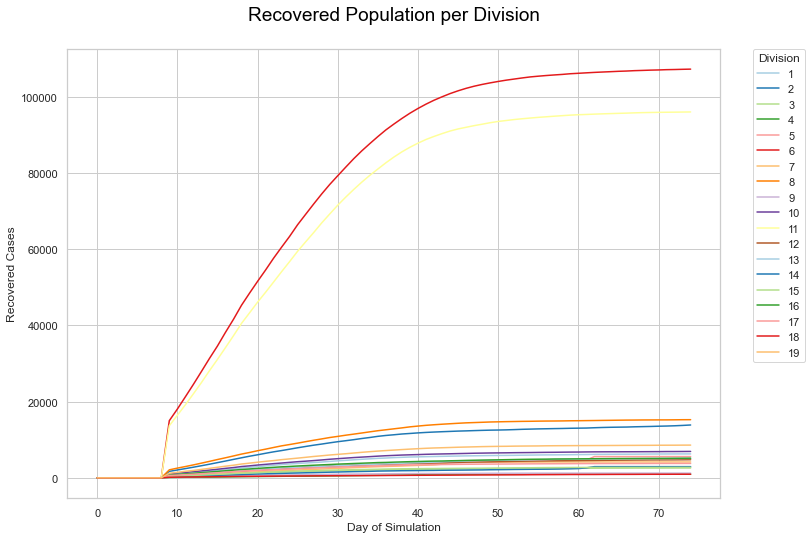

In [25]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt = sns.lineplot(x=all_df['day'],y=all_df['recovered'], hue = all_df['division'],palette="Paired")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Division')
plt.set_title("Recovered Population per Division", 
             fontsize = 19,
             y=1.05,
             color='black')
plt.set(xlabel='Day of Simulation', 
       ylabel = 'Recovered Cases')

[Text(0.5, 0, 'Day of Simulation'), Text(0, 0.5, 'New Cases')]

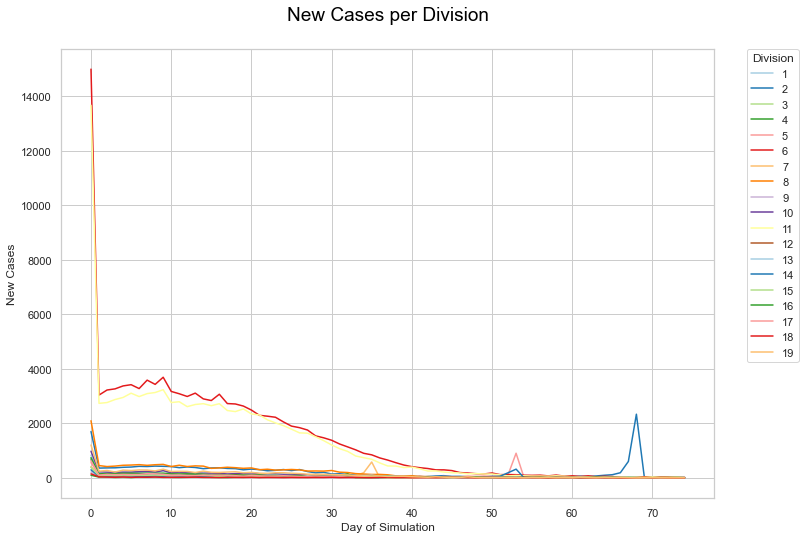

In [26]:
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt = sns.lineplot(x=all_df['day'],y=all_df['new_cases'], hue = all_df['division'],palette="Paired")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Division')
plt.set_title("New Cases per Division", 
             fontsize = 19,
             y=1.05,
             color='black')
plt.set(xlabel='Day of Simulation', 
       ylabel = 'New Cases')

In [27]:
high_pop = all_df[all_df.population > 20000]
high_pop["pop_range"] = 4
low_pop = all_df[all_df.population < 3000]
low_pop["pop_range"] = 1
high_mid_pop = all_df[(all_df.population <= 20000) & (all_df.population >= 10000)]
high_mid_pop["pop_range"] = 3
low_mid_pop = all_df[(all_df.population <= 10000) & (all_df.population >= 3000)]
low_mid_pop["pop_range"] = 2

new_df = pd.concat([high_pop, low_pop, high_mid_pop, low_mid_pop])

C:\Users\erinp\AppData\Local\Temp/ipykernel_7180/3054894600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pop["pop_range"] = 4
C:\Users\erinp\AppData\Local\Temp/ipykernel_7180/3054894600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_pop["pop_range"] = 1
C:\Users\erinp\AppData\Local\Temp/ipykernel_7180/3054894600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

[Text(0.5, 0, 'Day of Simulation'), Text(0, 0.5, 'New Cases per 1000 People')]

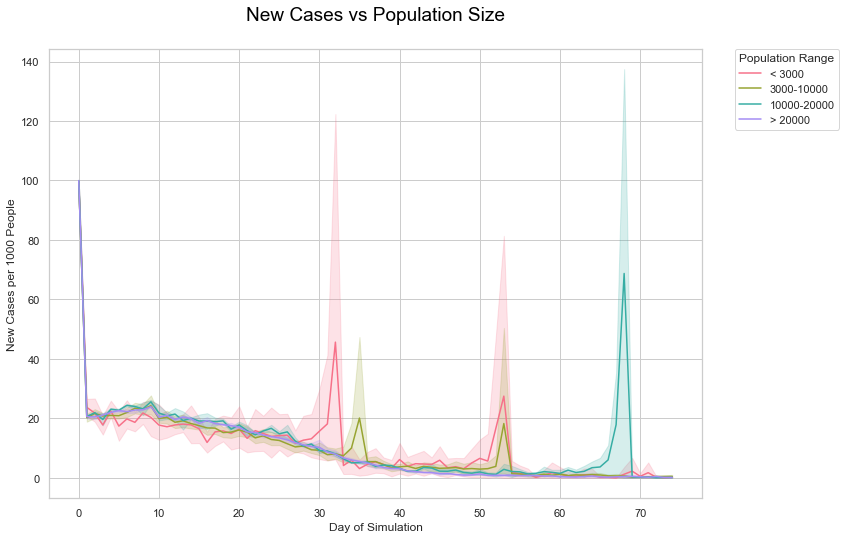

In [28]:
sns.set_style("whitegrid")
cpalette = sns.color_palette("husl", 4)
plt = sns.lineplot(x=new_df['day'],y=new_df['new_cases_per_1000'], hue = new_df['pop_range'],palette=cpalette)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Population Range', labels=['< 3000', '3000-10000', '10000-20000', '> 20000'])
plt.set_title("New Cases vs Population Size", 
             fontsize = 19,
             y=1.05,
             color='black')
plt.set(xlabel='Day of Simulation', 
       ylabel = 'New Cases per 1000 People')